# Dataset Preparation

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           3126         80  1.0              
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20           3897         75  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data      7KB  2024-05-25 23:55:26          11328        203  1.0              
teocalvo/teomewhy-loyalty-system                                T

In [6]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 49.7MB/s]


In [7]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# EDA & Preprocessing Data (Missing Values)


In [8]:
import pandas as pd

# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt


dataTrain = pd.read_csv("train.csv")
dataTest = pd.read_csv("test.csv")
dataGS = pd.read_csv("gender_submission.csv")
dataTrain.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
print(dataTrain.shape)

(891, 12)


In [10]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
dataTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# karena data null yang terlalu banyak dan juga feature Cabin tidak terlalu significant penggunaan dalam model, maka diputuskan untuk di drop saja
datanot = dataTrain.drop(['Cabin'], axis = 1)

In [13]:
datanot.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
# melakukan fill missing value Embarked dengan modus pada Embarked
mode = datanot['Embarked'].dropna().mode()[0]


In [15]:
datanot['Embarked'].fillna(mode, inplace = True)

In [16]:
datanot.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [17]:
datanot.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
datanot['Sex'].value_counts(dropna = False)

Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
datanot[['Sex', 'Survived']].groupby('Sex', as_index= False).mean().sort_values(by = 'Survived' , ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

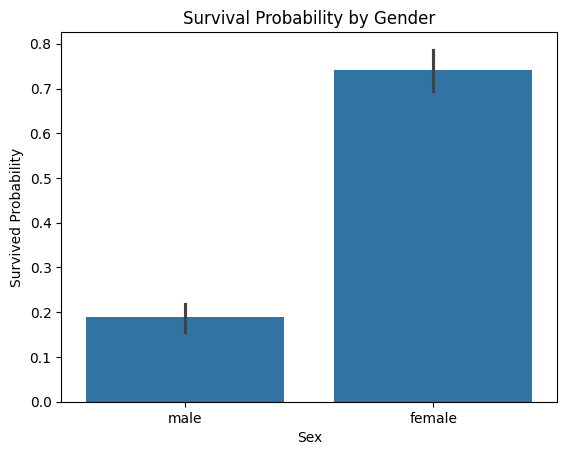

In [20]:
sns.barplot(x= 'Sex', y = 'Survived', data = datanot)
plt.ylabel('Survived Probability')
plt.title('Survival Probability by Gender')

In [21]:
datanot['Pclass'].value_counts(dropna = False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [22]:
datanot[['Pclass', 'Survived']].groupby('Pclass', as_index= False).mean()


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Embarked')

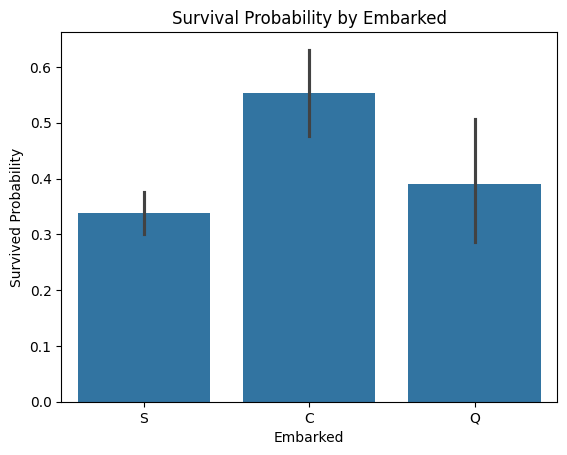

In [23]:
sns.barplot(x= 'Embarked', y = 'Survived', data = datanot)
plt.ylabel('Survived Probability')
plt.title('Survival Probability by Embarked')

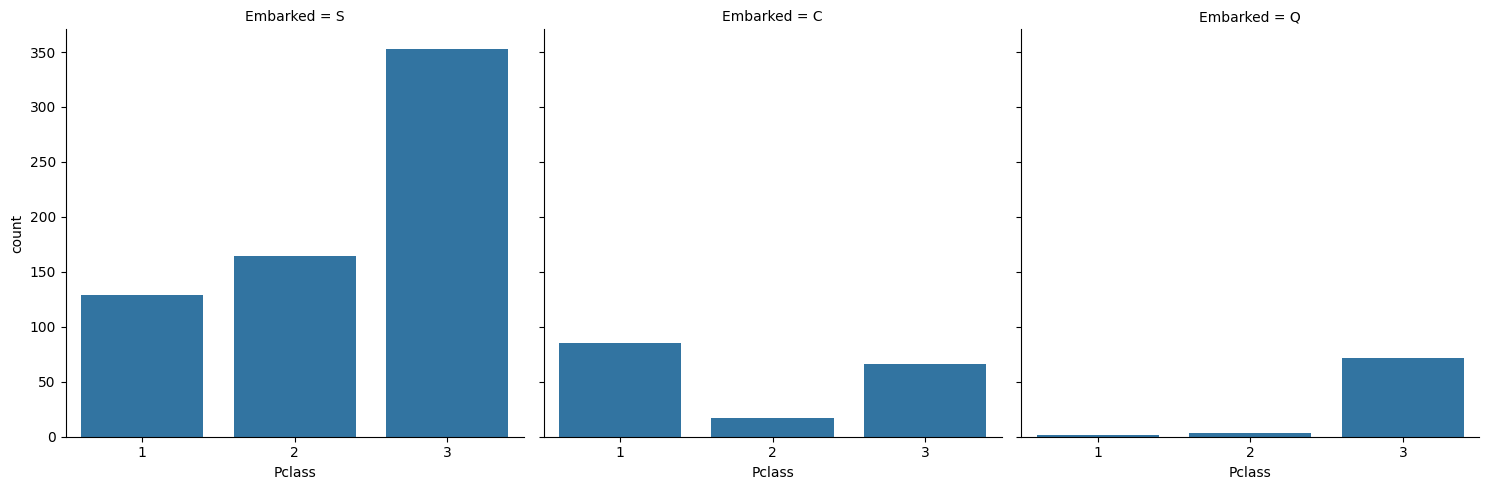

In [24]:
sns.catplot(x = 'Pclass', col = 'Embarked', data = datanot, kind = 'count')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


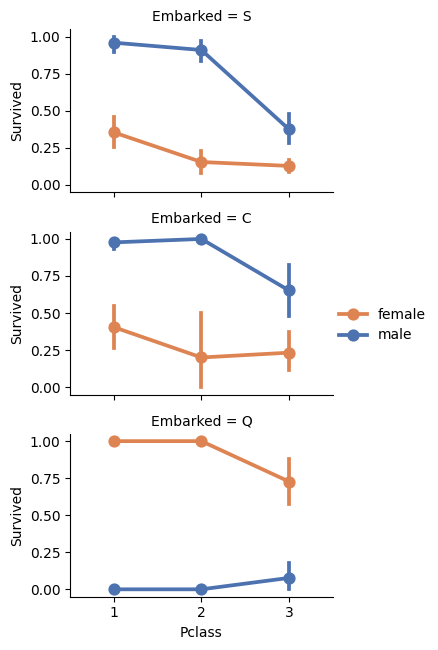

In [25]:
# melakukan evaluasi hubungan antara tempat embarked dengan tingkat suvival
grid = sns.FacetGrid(datanot, row = 'Embarked', height = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

Text(0, 0.5, 'Survived')

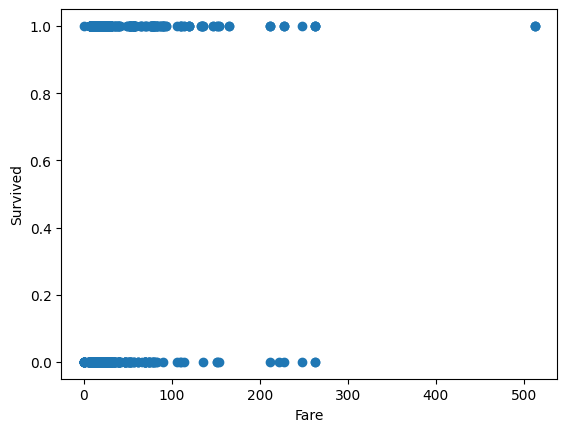

In [38]:
# adanya outliers pada data fare
plt.scatter(x = datanot["Fare"], y = datanot["Survived"])
plt.xlabel("Fare")
plt.ylabel("Survived")

Text(0, 0.5, 'Survived')

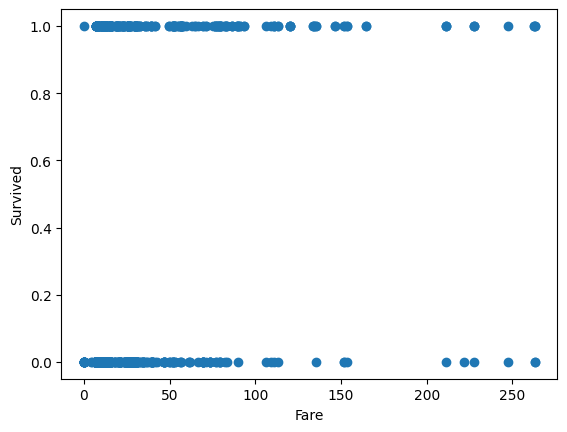

In [40]:
# penghapusan data outliers
datanot = datanot[datanot["Fare"] < 400]

plt.scatter(x = datanot["Fare"], y = datanot["Survived"])
plt.xlabel("Fare")
plt.ylabel("Survived")

In [26]:
# mengecek data yang kosong, dan ditemukan bahwa pada age masih banyak yang kosong
datanot.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

<Axes: >

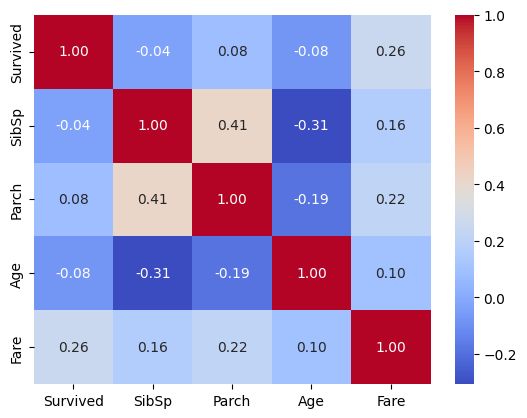

In [27]:
sns.heatmap(datanot[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

<ipython-input-28-233840270d5b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datanot['Age'], label = 'Skewness: %.2f' % (datanot['Age'].skew()))


Text(0.5, 1.0, 'Passenger Age Distribution')

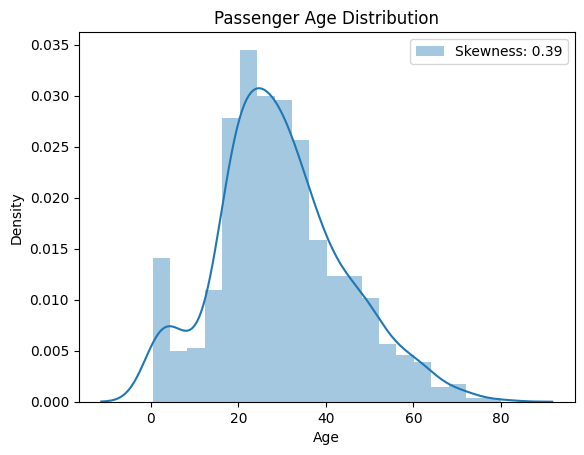

In [28]:
sns.distplot(datanot['Age'], label = 'Skewness: %.2f' % (datanot['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


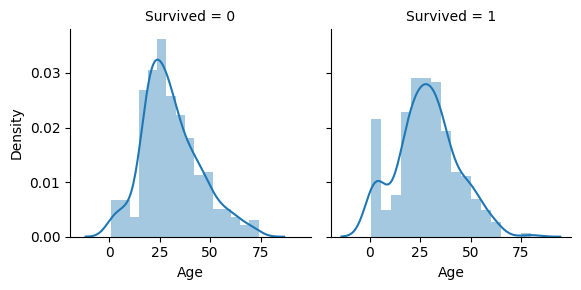

In [29]:
g = sns.FacetGrid(datanot, col = 'Survived')
g.map(sns.distplot, 'Age')

<ipython-input-30-8564572c5b1b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Pclass', y = 'Age', data = datanot, palette = 'winter')


<Axes: xlabel='Pclass', ylabel='Age'>

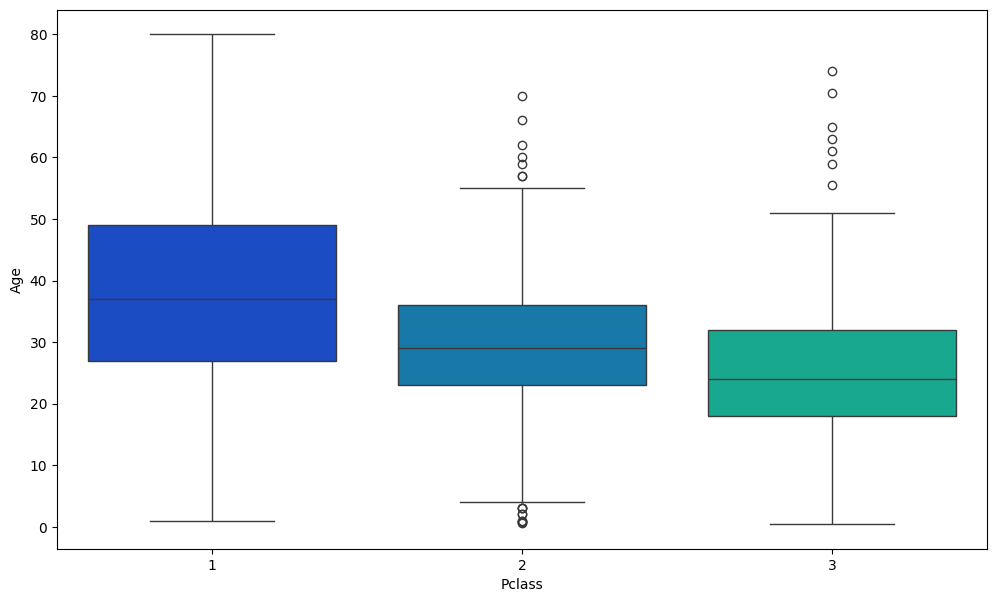

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = datanot, palette = 'winter')

# plt.yticks(range(0,140))
# plt.gca().set_yticklabels([format(x) for x in plt.gca().get_yticks()])

In [31]:
import random as r
import numpy as np

#dari box plot diatas, saya mengambil nilai random dari persebaran data age yang tergantung dari PClass

def input_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return r.randint(28,48)

    elif Pclass == 2:
      return r.randint(23,36)

    else :
      return r.randint(20,29)

  else:
    return Age

In [32]:
  # menggunakan function yang sudah di bangun diatas
  datanot['Age'] = datanot[['Age', 'Pclass']].apply(input_age, axis = 1)

In [33]:
# sudah tidak ada null values
datanot.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
datanot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Building Model & Evaluation

Accuracy: 0.8426966292134831

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       160
           1       0.84      0.76      0.79       107

    accuracy                           0.84       267
   macro avg       0.84      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267

AUC-ROC: 0.8627920560747663


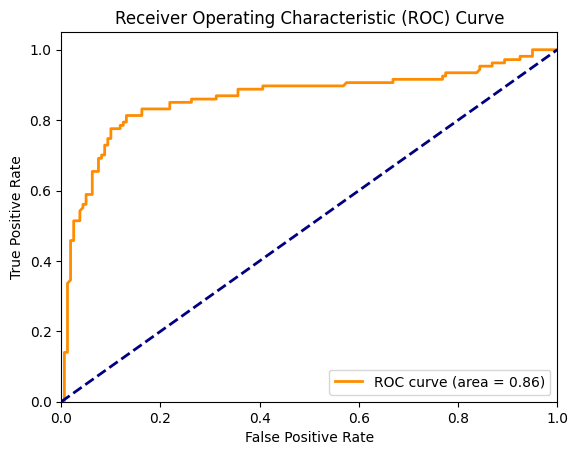

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Alasan penggunaan LabelEncoder: encoder sederhana yang lebih efisien dibanding encoder lainnya dan tidak membutuhkan waktu yang lama.
le = LabelEncoder()
for name in datanot.columns:
    if datanot[name].dtypes == 'O':
        datanot[name] = datanot[name].astype(str)
        datanot[name] = le.fit_transform(datanot[name])

X = datanot[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = datanot['Survived']

# Split data training dan test menjadi 70 : 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Alasan penggunaan StandardScaler: penyebaran data yang konsisten di antara mean = 0 dan standar deviasi = 1 dan scaler ini sederhana untuk digunakan.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilitas prediksi untuk kelas positif

# Evaluasi Performa dengan Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluasi Performa dengan precision, recall, F-1 score dan Support
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluasi Performa dengan AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_prob)
print("AUC-ROC:", auc_roc)

# Plot untuk AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


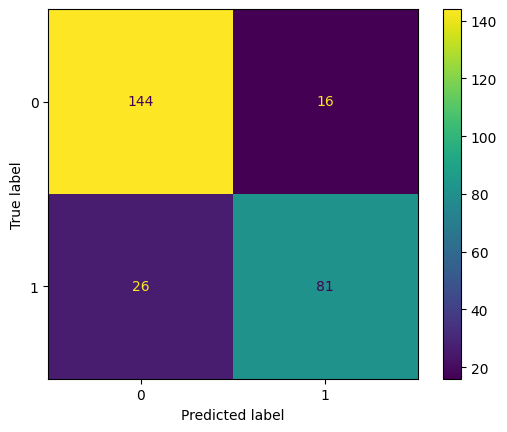

In [47]:
# Evaluation Dengan Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)